# Image classification

In [1]:
# import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check the version of tensorflow
print(tf.__version__)

2.10.1


In [3]:
# load the FMNIST dataset
df = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 4s 1us/step


In [7]:
print(df[0][0].shape) # X_train
print(df[1][0].shape) # X_test
print(df[0][1].shape) # y_train
print(df[1][1].shape) # y_test

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [8]:
(X_train, y_train), (X_test, y_test) = df

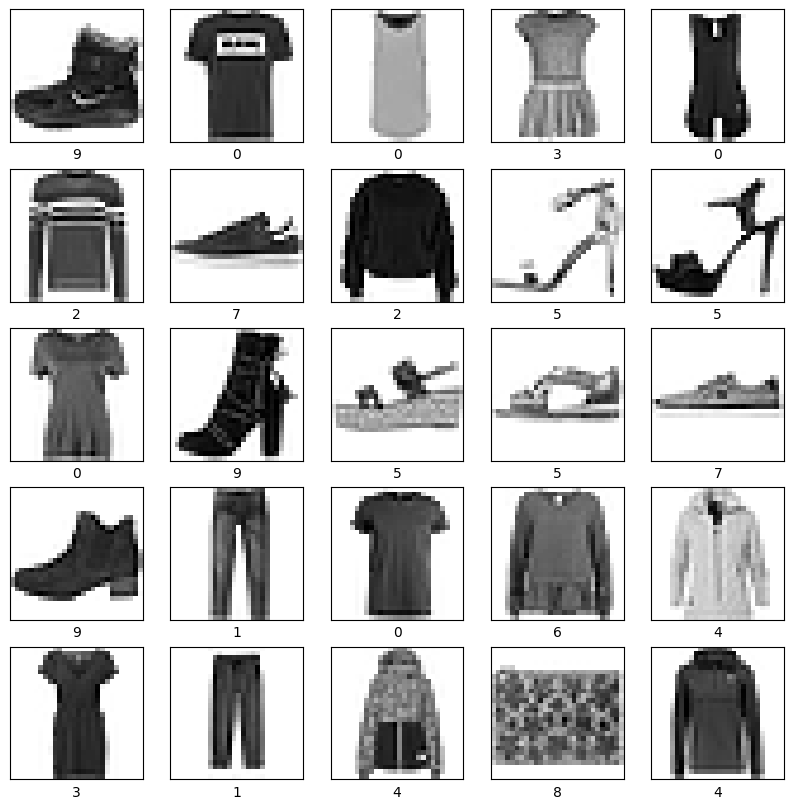

In [9]:
# display the first 25 images from the training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [10]:
# class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

 | class | name |
 | --- | --- |
 | 0 | T-shirt/top |
 | 1 | Trouser |
 | 2 | Pullover |
 | 3 | Dress |
 | 4 | Coat |
 | 5 | Sandal |
 | 6 | Shirt |
 | 7 | Sneaker |
 | 8 | Bag |
 | 9 | Ankle boot |

In [12]:
# data matrix

for row in X_train[0]:
    for i in row:
        print("{:3}".format(i), end=' ')
    print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3 
  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15 
  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66 
  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 223 215 213 164 127 

In [13]:
# normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# print the matrix after normalization
for row in X_train[0]:
    for i in row:
        print("{:0.3f}".format(i), end=' ')
    print()

0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.004 0.000 0.000 0.051 0.286 0.000 0.000 0.004 0.016 0.000 0.000 0.000 0.000 0.004 0.004 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.012 0.000 0.141 0.533 0.498 0.243 0.212 0.000 0.000 0.000 0.004 0.012 0.016 0.000 0.000 0.012 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.024 0.000 0.400 0.800 0.690 0.525 0.565 0.482 0.090 0.000 0.000 0.000 0.000 0.047

In [15]:
# convert data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# reshape the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [17]:
# create the model
model = keras.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(10, activation='softmax')
])

# model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                  

In [18]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
# train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 33s 19ms/step - loss: 0.4792 - accuracy: 0.8267 - val_loss: 0.3332 - val_accuracy: 0.8811
Epoch 2/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.3059 - accuracy: 0.8893 - val_loss: 0.2936 - val_accuracy: 0.8978
Epoch 3/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.2572 - accuracy: 0.9070 - val_loss: 0.2892 - val_accuracy: 0.8951
Epoch 4/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2297 - accuracy: 0.9161 - val_loss: 0.2532 - val_accuracy: 0.9082
Epoch 5/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.2066 - accuracy: 0.9240 - val_loss: 0.2359 - val_accuracy: 0.9150
Epoch 6/10
1500/1500 [==============================] - 27s 18ms/step - loss: 0.1869 - accuracy: 0.9314 - val_loss: 0.2434 - val_accuracy: 0.9143
Epoch 7/10
1500/1500 [==============================] - 29s 20ms/step - loss: 0.1668 - accuracy: 0.9398 - val_loss: 0.2376 -

In [20]:
# save the model
model.save('models/fashion_mnist.h5')

## Make Prediction

In [21]:
predictions = model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [22]:
print(predictions[0])

[2.3550209e-11 3.3881009e-11 4.9647786e-11 1.3225906e-10 3.8615728e-13
 1.3199477e-07 4.9896675e-12 6.2529364e-07 1.7973574e-09 9.9999928e-01]


This give us probability of each class.

 | class | name |
 | --- | --- |
 | 0 | T-shirt/top |
 | 1 | Trouser |
 | 2 | Pullover |
 | 3 | Dress |
 | 4 | Coat |
 | 5 | Sandal |
 | 6 | Shirt |
 | 7 | Sneaker |
 | 8 | Bag |
 | 9 | Ankle boot |
 
 the higher the probability the more likely the image is that class

In [28]:
print("Training label: " + str(np.argmax(predictions[0])))
print("Test label: " + str(y_test[0]))

Training label: 9
Test label: 9


as 9 has the highest probability, the image is most likely an ankle boot, can verify by looking at the test label

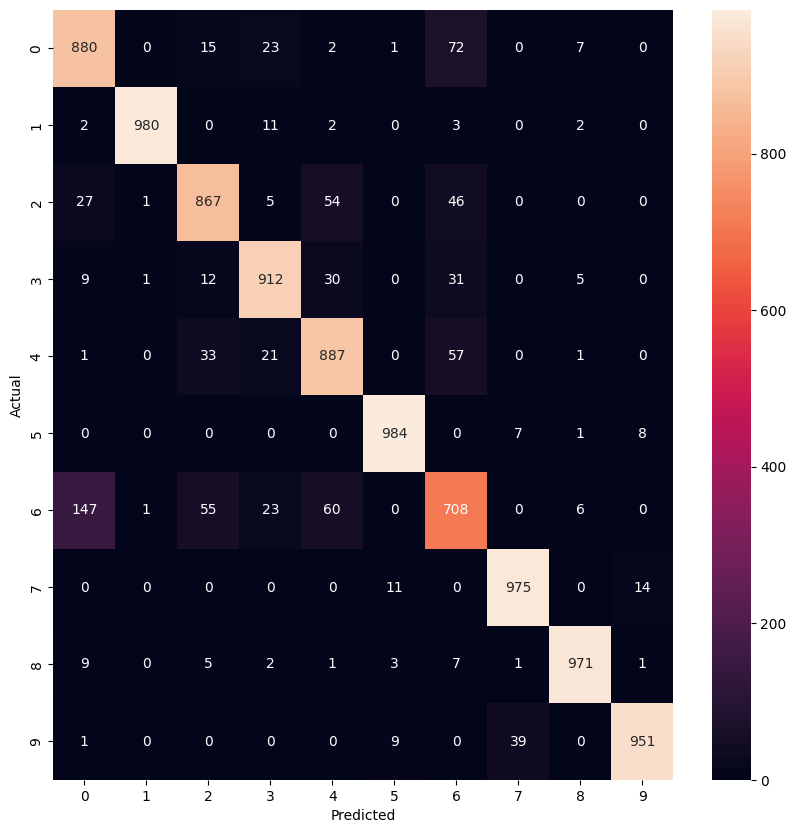

In [29]:
# draw confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, [np.argmax(i) for i in predictions])
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()